In [1]:
# Python Implementation of Fast Food Case Study

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

In [4]:
# Step 3: Collecting Data
# Load dataset from CSV file
from google.colab import files
uploaded = files.upload()
data=pd.read_csv('mcdonalds.csv')

Saving mcdonalds.csv to mcdonalds (1).csv


In [6]:
# Step 4: Exploring Data
# Transform categorical variables to binary numeric values
data_numeric = data.copy()
binary_cols = data.columns[:11]

for col in binary_cols:
    data_numeric[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Summary of transformed data
print(data_numeric[binary_cols].mean())

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


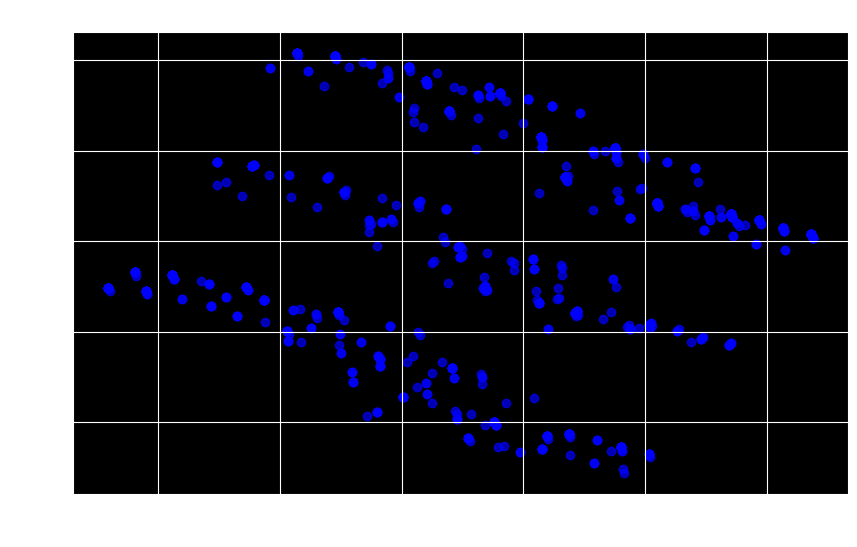

In [7]:
# PCA for perceptual map
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_numeric[binary_cols])

plt.figure(figsize=(10, 6))
plt.style.use("dark_background")
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c='blue')
plt.title('Perceptual Map')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [8]:
# Step 5: Extracting Segments using K-Means
kmeans = KMeans(n_clusters=4, random_state=1234)
data_numeric['Segment'] = kmeans.fit_predict(data_numeric[binary_cols])

print(data_numeric['Segment'].value_counts())


Segment
0    580
3    323
2    322
1    228
Name: count, dtype: int64


In [11]:
# Step 6: Profiling Segments
# Select only numeric columns for calculating the mean
numeric_cols = data_numeric.select_dtypes(include=np.number).columns
profiles = data_numeric.groupby('Segment')[numeric_cols].mean()  # Calculate mean only for numeric cols

print("Segment Profiles:")
print(profiles)

Segment Profiles:
            yummy  convenient     spicy  fattening    greasy      fast  \
Segment                                                                  
0        0.887931    0.981034  0.086207   0.794828  0.329310  0.960345   
1        0.017544    0.653509  0.078947   0.907895  0.701754  0.728070   
2        0.024845    0.900621  0.077640   0.928571  0.664596  0.953416   
3        0.854489    0.962848  0.133127   0.907121  0.619195  0.860681   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Segment                                                                  
0        0.922414  0.975862   0.017241  0.320690    0.043103  2.245283   
1        0.074561  0.087719   0.951754  0.065789    0.706140 -1.291667   
2        0.878882  0.152174   0.009317  0.068323    0.413043 -0.787072   
3        0.108359  0.931889   0.897833  0.204334    0.105263  1.810219   

               Age  Segment  
Segment                      
0        43.470690      0.0  
1 

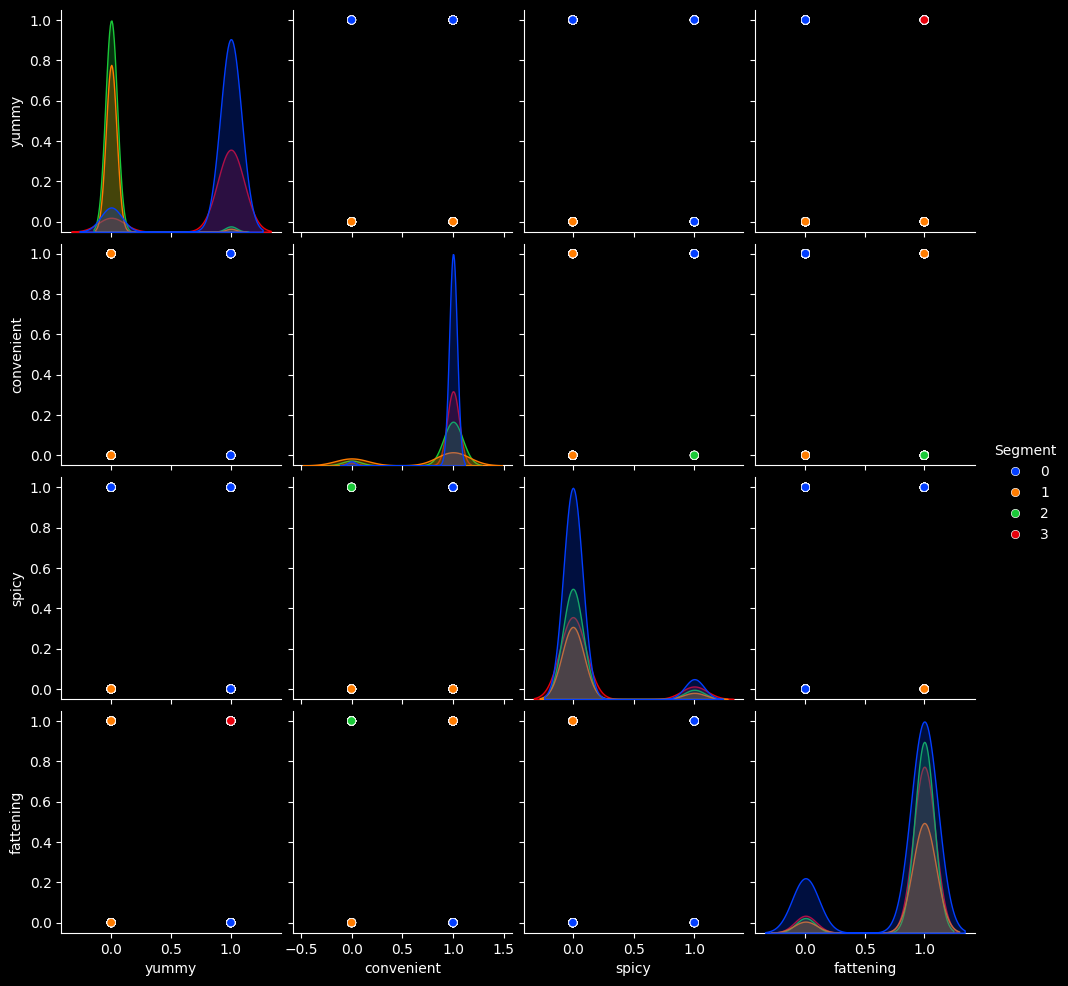

In [12]:
# Step 7: Describing Segments
sns.pairplot(data_numeric, hue='Segment', vars=binary_cols[:4], palette='bright')
plt.show()

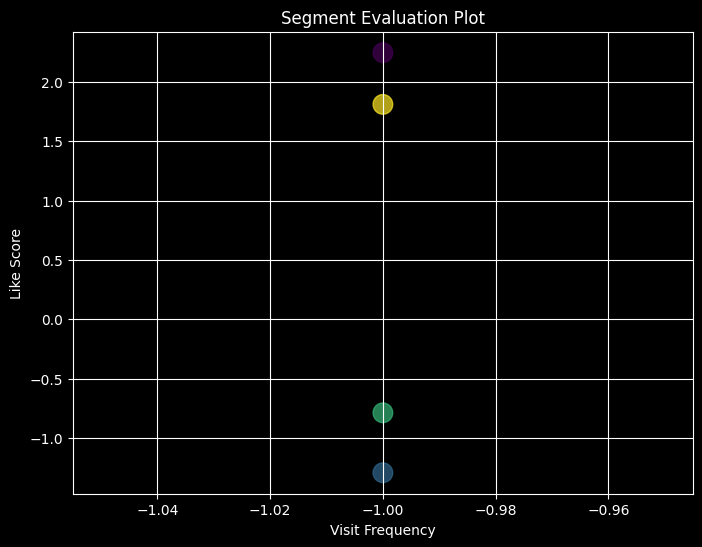

In [13]:
# Step 8: Selecting Target Segments
# Simplified evaluation plot
visit_mean = data_numeric.groupby('Segment')['VisitFrequency'].apply(lambda x: pd.Categorical(x, categories=['Rarely', 'Monthly', 'Weekly']).codes.mean())
like_mean = data_numeric.groupby('Segment')['Like'].mean()
plt.figure(figsize=(8, 6))
plt.scatter(visit_mean, like_mean, s=200, alpha=0.7, c=range(4), cmap='viridis')
plt.title('Segment Evaluation Plot')
plt.xlabel('Visit Frequency')
plt.ylabel('Like Score')
plt.grid(True)
plt.show()

In [14]:
# Step 9: Customizing the Marketing Mix
selected_segment = 2
marketing_mix = {
    "Product": "Healthy menu options",
    "Price": "Affordable deals",
    "Place": "Digital delivery platforms",
    "Promotion": "Health-focused campaigns"
}
print(f"Targeting Segment {selected_segment} with Marketing Mix:", marketing_mix)

Targeting Segment 2 with Marketing Mix: {'Product': 'Healthy menu options', 'Price': 'Affordable deals', 'Place': 'Digital delivery platforms', 'Promotion': 'Health-focused campaigns'}


In [15]:
# Step 10: Evaluation and Monitoring
# Placeholder for evaluation loop
print("Monitor customer feedback and adjust marketing strategies dynamically.")

Monitor customer feedback and adjust marketing strategies dynamically.
